

## Introduction:

### Clustering

It is basically a type of unsupervised learning method . An unsupervised learning method is a method in which we draw references from datasets consisting of input data without labelled responses. Generally, it is used as a process to find meaningful structure, explanatory underlying processes, generative features, and groupings inherent in a set of examples.

Clustering is the task of dividing the population or data points into a number of groups such that data points in the same groups are more similar to other data points in the same group and dissimilar to the data points in other groups. It is basically a collection of objects on the basis of similarity and dissimilarity between them as given below.

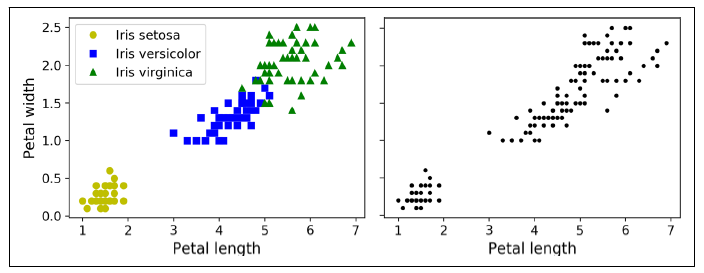

### K-Means
Consider the unlabeled dataset represented in the figure below: you can clearly see five
blobs of instances. The K-Means algorithm is a simple algorithm capable of clustering
this kind of dataset very quickly and efficiently, often in just a few iterations.

So, how does the algorithm work? we just start by placing the centroids randomly (e.g., by picking k instances at
random and using their locations as centroids). Then label the instances, update the
centroids, label the instances, update the centroids, and so on until the centroids stop
moving. The algorithm is guaranteed to converge in a finite number of steps (usually
quite small); it will not oscillate forever.

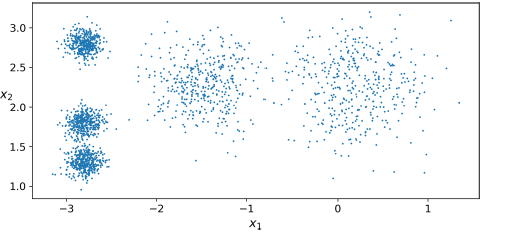

Sklearn enables us to quickly access the clustering algorithm i.e. K-means. To understand the K-means, lets create the above blob by using sklearn. To do so we will import make_blobs and provide it with center points and standard deviation

Let's start by generating some blobs:

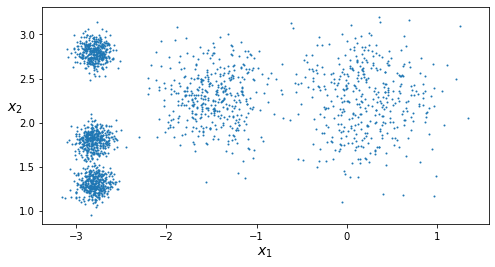

In [4]:
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt
blob_centers = np.array([[ 0.2,  2.3],
         [-1.5 ,  2.3],
         [-2.8,  1.8],
         [-2.8,  2.8],
         [-2.8,  1.3]])

blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])

X, y = make_blobs(n_samples=2000, centers=blob_centers,
                      cluster_std=blob_std, random_state=7)

#Now let's plot them:
def plot_clusters(X, y=None):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=1)
    plt.xlabel("$x_1$", fontsize=14)
    plt.ylabel("$x_2$", fontsize=14, rotation=0)

plt.figure(figsize=(8, 4))
plot_clusters(X)
plt.show()
    
#You will get the image given below!

### Training K-means Algorithm

Let’s train a K-Means clusterer on this dataset. It will try to find each blob’s center and
assign each instance to the closest blob:

In [5]:
from sklearn.cluster import KMeans
k = 5
kmeans = KMeans(n_clusters=k)
y_pred = kmeans.fit_predict(X)

In [18]:
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=30, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=30, linewidths=30,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)
        

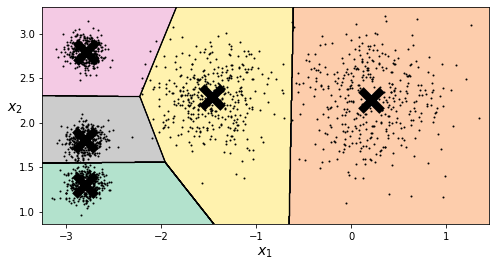

In [19]:
plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans, X)
plt.show()

Note that you have to specify the number of clusters k that the algorithm must find.
In this example, it is pretty obvious from looking at the data that k should be set to 5,
but in general it is not that easy. We will discuss this shortly.

Each instance was assigned to one of the five clusters. In the context of clustering, an
instance’s label is the index of the cluster that this instance gets assigned to by the
algorithm: this is not to be confused with the class labels in classification (remember
that clustering is an unsupervised learning task). 

The KMeans instance preserves a copy of the labels of the instances it was trained on, available via the labels_ instance
variable and We can also take a look at the five centroids that the algorithm found cluster_centers_ . 

In [8]:
print(kmeans.labels_)
print(kmeans.cluster_centers_)

[0 4 1 ... 2 1 4]
[[-2.80037642  1.30082566]
 [ 0.20876306  2.25551336]
 [-2.79290307  2.79641063]
 [-1.46679593  2.28585348]
 [-2.80389616  1.80117999]]


You can easily assign new instances to the cluster whose centroid is closest:

    X_new = np.array([[0, 2], [3, 2], [-3, 3], [-3, 2.5]])
    kmeans.predict(X_new)
    >>> array([1, 1, 2, 2], dtype=int32)

### How to intialize k-means algorithm
#### K-means++ method
In older K-means algorithm, centeriods were intialized randomly but there was problem with that the algorithm might choose poor random points and stuck into suboptimal solution therefore to overcome this problem; An important improvement to the K-Means algorithm, K-Means++, was proposed that introduced a smarter initialization step that tends to select centroids that are distant from one another, and this improvement makes the K-Means algorithm much less likely to converge to a
suboptimal solution. 

The KMeans class uses this initialization -> init = ‘k-means++’ <- method by default. If you want to force it to
use the original method (i.e., picking k instances randomly to define the initial centroids),
then you can set the init hyperparameter to "random". You will rarely need to
do this.

kmeans = KMeans(init= ???)

### How to Accelerated K-Means algorithm
#### Elkan algorithm
Another important improvement to the K-Means algorithm was proposed that considerably accelerates the algorithm by avoiding many unnecessary distance calculations. Elkan achieved this by exploiting the triangle inequality (i.e., that a straight line is always the shortest distance between two points5) and by keeping track of lower and upper bounds for distances between instances and centroids. 

This is the algorithm the KMeans class uses by default algorithm = "elkan" (you can force it to
use the original algorithm by setting the algorithm hyperparameter to "full", although you probably will never need to).

### Finding the optimal number of clusters
So far, we have set the number of clusters k to 5 because it was obvious by looking at
the data that this was the correct number of clusters. But in general, it will not be so
easy to know how to set k, and the result might be quite bad if you set it to the wrong
value.

There are two methods but you should know that the second method is the best one
1. Inertia Method -> which is the mean squared distance between each instance and its closest centroid.

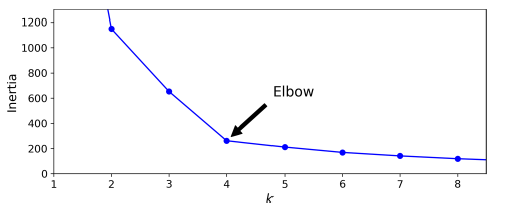

When plotting the inertia as a function of the number of clusters k, the curve
often contains an inflexion point called the “elbow” but sometimes elbow point doesn't appear!!

In [42]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X) for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]

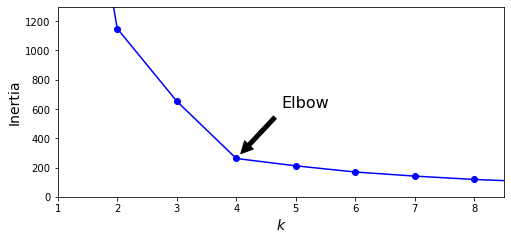

In [26]:
plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.annotate('Elbow',
             xy=(4, inertias[3]),
             xytext=(0.55, 0.55),
             textcoords='figure fraction',
             fontsize=16,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )
plt.axis([1, 8.5, 0, 1300])
plt.show()

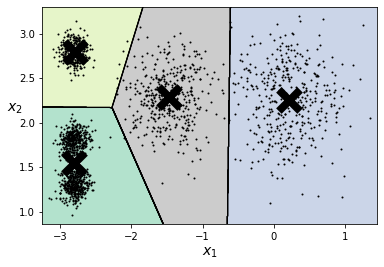

In [28]:
plot_decision_boundaries(kmeans_per_k[3], X)
plt.show()

2. Silhouette score

Another approach is to look at the _silhouette score_, which is the mean _silhouette coefficient_ over all the instances. An instance's silhouette coefficient is equal to $(b - a)/\max(a, b)$ where $a$ is the mean distance to the other instances in the same cluster (it is the _mean intra-cluster distance_), and $b$ is the _mean nearest-cluster distance_, that is the mean distance to the instances of the next closest cluster (defined as the one that minimizes $b$, excluding the instance's own cluster). The silhouette coefficient can vary between -1 and +1: a coefficient close to +1 means that the instance is well inside its own cluster and far from other clusters, while a coefficient close to 0 means that it is close to a cluster boundary, and finally a coefficient close to -1 means that the instance may have been assigned to the wrong cluster.

Let's plot the silhouette score as a function of $k$:

In [29]:
from sklearn.metrics import silhouette_score

In [30]:
silhouette_score(X, kmeans.labels_)

0.655517642572828

In [47]:
silhouette_scores = [silhouette_score(X, model.labels_) for model in kmeans_per_k[1:]]

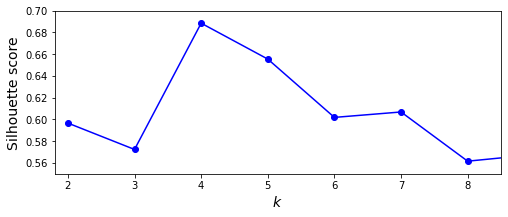

In [48]:
plt.figure(figsize=(8, 3))
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.axis([1.8, 8.5, 0.55, 0.7])
plt.show()

As you can see, this visualization is much richer than the previous one: in particular, although it confirms that $k=4$ is a very good choice, but it also underlines the fact that $k=5$ is quite good as well.


<h2><center>K Means Clustering ML </center></h2>


#### Task 1

Utilization of Clustering as Preprocessing step for supervised learning algorithm. Load the MNIST dataset and split it into a training set and a test set using sklearn train test split function. To load the dataset use built in sklearn functions as 
    
    from sklearn.datasets import load_digits
    X_digits, y_digits = load_digits(return_X_y=True)

Train the logistic regression classifier by using the following settings and then evaluate it 

    LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
    
for evaluation model you can use 

    log_reg.score(X_test, y_test)

The accuracy score you will get will be the base accuracy with any preprocessing step. Now import pipeline as done in previous lab to create a Pipeline and set the following parameters as

     pipeline = Pipeline([
        ("kmeans", KMeans(n_clusters=50, random_state=42)),
        ("log_reg", LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)),
    ])
    
Train your pipeline model using fit function on training dataset and then measure score on test dataset. Do you note any improvement or not?

In [ ]:
from sklearn.datasets import load_digits
X_digits, y_digits = load_digits(return_X_y=True)
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_digits,y_digits)

n_clusters parameter is selected randomly maybe tweaking this parameter might result in better results. Now use the silhouette_scores method to find the best value for number of clusters

In [6]:
from sklearn.linear_model import LogisticRegression ### your code here
log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
log_reg.fit(X_train,y_train)


LogisticRegression(max_iter=5000, multi_class='ovr', random_state=42)

In [7]:
log_reg.score(X_test,y_test)

0.9644444444444444

In [19]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X_train) for k in range(1, 150)]


In [20]:
silhouette_scores = [silhouette_score(X_train, model.labels_) for model in kmeans_per_k[1:]]

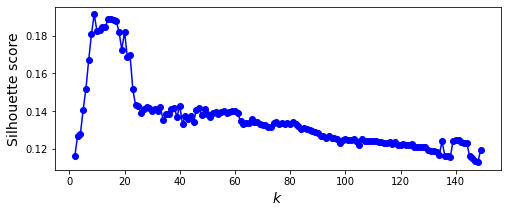

In [22]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 3))
plt.plot(range(2, 150), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
#plt.axis([1.8, 102, 0.55, 1])
plt.show()

In [16]:
from sklearn.pipeline import Pipeline
pipeline = Pipeline([
    ("kmeans", KMeans(n_clusters=10, random_state=42)),
    ("log_reg", LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)),
])

In [17]:
pipeline.fit(X_train,y_train)

Pipeline(steps=[('kmeans', KMeans(n_clusters=10, random_state=42)),
                ('log_reg',
                 LogisticRegression(max_iter=5000, multi_class='ovr',
                                    random_state=42))])

In [18]:
pipeline.score(X_test,y_test)

0.9266666666666666

When K-Means is used as preprocessing step in a classification pipeline, finding a good value for  𝑘  is much simpler than earlier: 
Another best method for best value of  𝑘  is simply the one that results in the best classification performance. To do so use the GridSearchCV method as follow 

    param_grid = dict(kmeans__n_clusters=range(2, 100))
    grid_clf = GridSearchCV(pipeline, param_grid, cv=3, verbose=2)

now train the grid classifer on the training set and you can access the best k value from grid_clf.best_params_. Now compare your best_params_ and result obtained from silhouette graph. which one is better? Measure the accuracy score on test dataset and compare results! 
    

In [23]:
from sklearn.model_selection import GridSearchCV ### your code here
param_grid = dict(kmeans__n_clusters=range(2, 100))
grid_clf = GridSearchCV(pipeline, param_grid, cv=3, verbose=2)
grid_clf.fit(X_train,y_train)

Fitting 3 folds for each of 98 candidates, totalling 294 fits
[CV] kmeans__n_clusters=2 ............................................
[CV] ............................. kmeans__n_clusters=2, total=   0.2s

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s



[CV] kmeans__n_clusters=2 ............................................
[CV] ............................. kmeans__n_clusters=2, total=   0.2s
[CV] kmeans__n_clusters=2 ............................................
[CV] ............................. kmeans__n_clusters=2, total=   0.2s
[CV] kmeans__n_clusters=3 ............................................
[CV] ............................. kmeans__n_clusters=3, total=   0.2s
[CV] kmeans__n_clusters=3 ............................................
[CV] ............................. kmeans__n_clusters=3, total=   0.2s
[CV] kmeans__n_clusters=3 ............................................
[CV] ............................. kmeans__n_clusters=3, total=   0.2s
[CV] kmeans__n_clusters=4 ............................................
[CV] ............................. kmeans__n_clusters=4, total=   0.3s
[CV] kmeans__n_clusters=4 ............................................
[CV] ............................. kmeans__n_clusters=4, total=   0.2s
[CV] 

[CV] ............................ kmeans__n_clusters=21, total=   2.9s
[CV] kmeans__n_clusters=22 ...........................................
[CV] ............................ kmeans__n_clusters=22, total=   2.8s
[CV] kmeans__n_clusters=22 ...........................................
[CV] ............................ kmeans__n_clusters=22, total=   2.9s
[CV] kmeans__n_clusters=22 ...........................................
[CV] ............................ kmeans__n_clusters=22, total=   4.1s
[CV] kmeans__n_clusters=23 ...........................................
[CV] ............................ kmeans__n_clusters=23, total=   3.2s
[CV] kmeans__n_clusters=23 ...........................................
[CV] ............................ kmeans__n_clusters=23, total=   3.2s
[CV] kmeans__n_clusters=23 ...........................................
[CV] ............................ kmeans__n_clusters=23, total=   3.0s
[CV] kmeans__n_clusters=24 ...........................................
[CV] .

[CV] ............................ kmeans__n_clusters=41, total=   8.8s
[CV] kmeans__n_clusters=41 ...........................................
[CV] ............................ kmeans__n_clusters=41, total=   8.9s
[CV] kmeans__n_clusters=41 ...........................................
[CV] ............................ kmeans__n_clusters=41, total=   5.6s
[CV] kmeans__n_clusters=42 ...........................................
[CV] ............................ kmeans__n_clusters=42, total=  10.4s
[CV] kmeans__n_clusters=42 ...........................................
[CV] ............................ kmeans__n_clusters=42, total=   9.0s
[CV] kmeans__n_clusters=42 ...........................................
[CV] ............................ kmeans__n_clusters=42, total=   8.6s
[CV] kmeans__n_clusters=43 ...........................................
[CV] ............................ kmeans__n_clusters=43, total=  11.2s
[CV] kmeans__n_clusters=43 ...........................................
[CV] .

[CV] ............................ kmeans__n_clusters=60, total=   9.4s
[CV] kmeans__n_clusters=60 ...........................................
[CV] ............................ kmeans__n_clusters=60, total=   8.6s
[CV] kmeans__n_clusters=61 ...........................................
[CV] ............................ kmeans__n_clusters=61, total=   8.8s
[CV] kmeans__n_clusters=61 ...........................................
[CV] ............................ kmeans__n_clusters=61, total=   9.6s
[CV] kmeans__n_clusters=61 ...........................................
[CV] ............................ kmeans__n_clusters=61, total=  10.0s
[CV] kmeans__n_clusters=62 ...........................................
[CV] ............................ kmeans__n_clusters=62, total=   9.0s
[CV] kmeans__n_clusters=62 ...........................................
[CV] ............................ kmeans__n_clusters=62, total=  10.6s
[CV] kmeans__n_clusters=62 ...........................................
[CV] .

[CV] ............................ kmeans__n_clusters=79, total=   9.5s
[CV] kmeans__n_clusters=80 ...........................................
[CV] ............................ kmeans__n_clusters=80, total=  17.3s
[CV] kmeans__n_clusters=80 ...........................................
[CV] ............................ kmeans__n_clusters=80, total=  13.8s
[CV] kmeans__n_clusters=80 ...........................................
[CV] ............................ kmeans__n_clusters=80, total=   9.5s
[CV] kmeans__n_clusters=81 ...........................................
[CV] ............................ kmeans__n_clusters=81, total=  15.9s
[CV] kmeans__n_clusters=81 ...........................................
[CV] ............................ kmeans__n_clusters=81, total=  11.0s
[CV] kmeans__n_clusters=81 ...........................................
[CV] ............................ kmeans__n_clusters=81, total=  12.0s
[CV] kmeans__n_clusters=82 ...........................................
[CV] .

[CV] ............................ kmeans__n_clusters=99, total=  13.5s
[CV] kmeans__n_clusters=99 ...........................................
[CV] ............................ kmeans__n_clusters=99, total=  13.9s
[CV] kmeans__n_clusters=99 ...........................................
[CV] ............................ kmeans__n_clusters=99, total=   8.9s


[Parallel(n_jobs=1)]: Done 294 out of 294 | elapsed: 35.5min finished


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('kmeans',
                                        KMeans(n_clusters=10, random_state=42)),
                                       ('log_reg',
                                        LogisticRegression(max_iter=5000,
                                                           multi_class='ovr',
                                                           random_state=42))]),
             param_grid={'kmeans__n_clusters': range(2, 100)}, verbose=2)

In [24]:
grid_clf.best_params_

{'kmeans__n_clusters': 94}

In [26]:
grid_clf.best_estimator_.score(X_test,y_test)

0.9866666666666667